#### DICOM imgages
(C) MK & ASL & AL

Reads DICOM files, normalize them them


Started: 2019.11.21

Modified: 2019.11.22

In [1]:
import os
import numpy as np
import pydicom as dicom
import matplotlib.pyplot as plt

# my imports
import mkViewer2A as mkv
import functions1 as f1

%matplotlib qt5

#### Main script

In [6]:
# Folder with all Nifit images
adniPth = os.path.join('/','media','mk','p1ext4','no19','adni')
adniMainPth = os.path.join(adniPth, 'ADNI_from_Alexander', 'DownloadedNIfTI')
folder = os.path.join(adniMainPth, 'ADNI')

dcm2npyPth = os.path.join(adniMainPth, 'DCM2NPY')
statslPth = os.path.join(adniMainPth, 'STATSL')
statim3dPth = os.path.join(adniMainPth, 'STATIM3D')

# A global variable
PRINT = False

os.chdir(folder)
f1.pthInfo()

Current folder is:
	/media/mk/p1ext4/no19/adni/ADNI_from_Alexander/DownloadedNIfTI/ADNI


In [7]:
os.chdir(dcm2npyPth)
im3d  = np.load('002_S_0295-S150056.npy')
f1.pthInfo()
f1.info(im3d,'002_S_0295-S150056')

Current folder is:
	/media/mk/p1ext4/no19/adni/ADNI_from_Alexander/DownloadedNIfTI/DCM2NPY
 002_S_0295-S150056: min=0.00, aver=57.43,  max=1152.00, shape=(256, 256, 170),dtype=uint16


['002_S_0295-S150056.npy', '002_S_0413-S32946.npy', '002_S_0413-S54591.npy', '002_S_0413-S66926.npy', '002_S_0559-S14875.npy', '002_S_0559-S15922.npy', '002_S_0559-S69299.npy', '002_S_0619-S15146.npy', '002_S_0619-S33969.npy', '002_S_0685-S55757.npy', '002_S_0729-S72365.npy', '002_S_0782-S17835.npy', '002_S_0782-S29564.npy', '002_S_0816-S29070.npy', '002_S_0816-S45030.npy', '002_S_0938-S41835.npy', '002_S_0954-S41689.npy', '002_S_0955-S20004.npy', '002_S_1070-S43525.npy', '002_S_1070-S55381.npy', '002_S_1155-S44642.npy', '002_S_1261-S214921.npy', '002_S_1261-S38705.npy', '002_S_1261-S50897.npy', '002_S_1280-S47415.npy', '002_S_1280-S63389.npy', '002_S_1280-S804649.npy', '002_S_2010-S93650.npy', '002_S_2010-S98070.npy', '002_S_2073-S231273.npy', '002_S_4171-S118011.npy', '002_S_4213-S144140.npy', '002_S_4225-S134953.npy', '002_S_4229-S123039.npy', '002_S_4229-S134608.npy', '002_S_4262-S325475.npy', '002_S_4270-S125081.npy', '002_S_4270-S125083.npy', '002_S_4270-S149120.npy', '002_S_4447

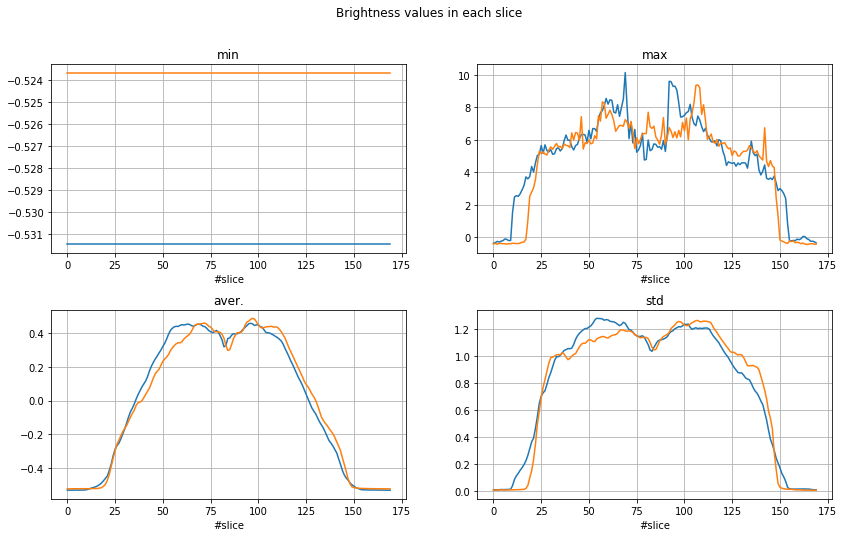

In [8]:

files = os.listdir('.')
files.sort()

fig, ax = plt.subplots(2,2, figsize=(14,8))
plt.suptitle('Brightness values in each slice')
plt.subplots_adjust(hspace=0.3)

fCnt = 0
fAllCnt = len(files)
for f in files[:2]:
    fCnt +=1
    print("{}/{}".format(fCnt,fAllCnt), end='\r')

    
    im = np.load(f)
    sx,sy,sz = im.shape
    
    stat = np.zeros((sz,4), dtype=np.float32)
    statN = np.zeros((sz,4), dtype=np.float32)
    statS = np.zeros((sz,4), dtype=np.float32)
    
    
    # normalization to <0,1>
    imN = im/im.max()
    imS = (im - im.mean()) / im.std()
    #f1.info(im,f)
    
    for k in range(sz):
        stat[k,:] = im[:,:,k].min(), im[:,:,k].max(), im[:,:,k].mean(), im[:,:,k].std()        
        statN[k,:] = imN[:,:,k].min(), imN[:,:,k].max(), imN[:,:,k].mean(), imN[:,:,k].std()
        statS[k,:] = imS[:,:,k].min(), imS[:,:,k].max(), imS[:,:,k].mean(), imS[:,:,k].std()  
    
           
    stat11 = statS

    mn = stat11[:,0]
    mx = stat11[:,1]
    av = stat11[:,2]
    st = stat11[:,3]
    
    ax[0,0].plot(mn)
    ax[0,0].axes.grid(True)
    ax[0,0].set_title('min')   
    ax[0,0].set_xlabel('#slice')
    
    ax[0,1].plot(mx)
    ax[0,1].axes.grid(True)
    ax[0,1].set_title('max')   
    ax[0,1].set_xlabel('#slice')
   
    ax[1,0].plot(av)
    ax[1,0].axes.grid(True)
    ax[1,0].set_title('aver.') 
    ax[1,0].set_xlabel('#slice')
    
    ax[1,1].plot(st)
    ax[1,1].axes.grid(True)
    ax[1,1].set_title('std')
    ax[1,1].set_xlabel('#slice')
    

In [129]:
# a,b = np.histogram(im3d.flatten())

In [130]:
b = im[im>0]
print(b.size, im.size, im.size-b.size)

4854120 11141120 6287000


In [74]:
n, bins, patches = plt.hist(b, 50, facecolor='g', alpha=0.75)

In [76]:
a = np.random.randint(0,15,(4,5))
b = a[a>6]